In [86]:
import numpy as np
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

### links
Fetching Quandl API [link](https://blog.quandl.com/api-for-commodity-data) <br>
CHRIS index dataset [link](https://www.quandl.com/data/CHRIS-Wiki-Continuous-Futures/documentation/introduction)

## Load list of Futures and apply Market Filter
###### understanding the data structure hierachy
### Commodity index-database
- CHRIS_metadata.csv
    - contains all 600 futures from all markets
    - ~4000 rows ~8 for each future
    
### Market-filter
- we choose CME (chicaco mercantile exchange)
- filter by desired market to get all cme 

In [15]:
path="./data/"
# load metadata about futures
chris_meta=pd.read_csv(path+"CHRIS_metadata.csv")

# Filter for market
EXCHANGE="CME"
chris_meta=chris_meta[chris_meta["code"].str.contains(EXCHANGE)]
chris_meta

,code,name,description,refreshed_at,from_date,to_date
73,CME_0D1,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
74,CME_0D2,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
75,CME_0D3,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
76,CME_0D4,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
77,CME_0D5,Mini European 3.5% Fuel Oil Barges FOB Rdam (P...,Historical Futures Prices: Mini European 3.5% ...,2018-11-22 03:29:50,2014-02-18,2018-11-21
78,CME_0F1,Mini Singapore Fuel Oil 180 cst (Platts) Futur...,Historical Futures Prices: Mini Singapore Fuel...,2018-11-22 03:29:44,2014-02-18,2018-11-21
79,CME_0F2,Mini Singapore Fuel Oil 180 cst (Platts) Futur...,Historical Futures Prices: Mini Singapore Fuel...,2018-11-22 03:29:44,2014-02-18,2018-11-21
80,CME_1N1,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21
81,CME_1N2,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21
82,CME_1N3,"Singapore Mogas 92 Unleaded (Platts) Futures, ...",Historical Futures Prices: Singapore Mogas 92 ...,2018-11-22 03:29:49,2014-02-18,2018-11-21


## Filter commodities using regular expression
As we can see every future consists of multiple sub-codes 
We apply regex to only receive only one desired future (the first)

In [5]:
# apply regex to filter unique futures
regex_="\D*[0-9]*\D+(0|[2-9])*1$"
chris_meta = chris_meta[chris_meta["code"].str.match(regex_)]
futures_to_fetch=chris_meta["code"]
futures_to_fetch_list=futures_to_fetch.tolist()

In [222]:
# without regex using all future contracts
futures_to_fetch=chris_meta["code"]
futures_to_fetch_list=futures_to_fetch.tolist()

In [223]:
print("Furutes count: ",len(futures_to_fetch_list))

Furutes count:  3139


## Fetch from Quandl & Save to .csv

CHRIS/ + future + .column
- .0 Date
- .1 Open
- .2 High
- .3 Low
- .4 Last
- .5 Change
- .6 Settle
- .7 Volume
- .8 Previous Day Open Interest

In [234]:
import quandl

API_KEY_JOE="16-3ue4hzwtKNj3DSFYY"
quandl.ApiConfig.api_key=API_KEY_JOE

CHRIS="CHRIS/"
COL_=".4"
time_range=["daily","weekly","monthly","quarterly","annual"]

def fetch_chris_from_quandl(futures_to_fetch):
    sample_futures = futures_to_fetch[0:]
    sample_futures=[CHRIS + f + COL_ for f in sample_futures]
    df_commodities = quandl.get(sample_futures, collapse=time_range[0])
    return df_commodities

#df_commodities = fetch_chris_from_quandl(futures_to_fetch_list)
#df_commodities.to_csv(path+EXCHANGE+"_commodities_all.csv")

## Loading

In [267]:
# for testing use CME_commodities.csv     (405 cols)
# for deploy  use CME_commodities_all.csv (3139 cols)
df_commodities = pd.read_csv(path+EXCHANGE+"_commodities_all.csv", index_col=0)
df_commodities.iloc[:,:]

,CHRIS/CME_0D1 - Last,CHRIS/CME_0D2 - Last,CHRIS/CME_0D3 - Last,CHRIS/CME_0D4 - Last,CHRIS/CME_0D5 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_0F2 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1N2 - Last,CHRIS/CME_1N3 - Last,...,CHRIS/CME_Z931 - Last,CHRIS/CME_Z932 - Last,CHRIS/CME_Z933 - Last,CHRIS/CME_Z934 - Last,CHRIS/CME_Z94 - Last,CHRIS/CME_Z95 - Last,CHRIS/CME_Z96 - Last,CHRIS/CME_Z97 - Last,CHRIS/CME_Z98 - Last,CHRIS/CME_Z99 - Last
Date,,,,,,,,,,,,,,,,,,,,,
1959-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
df_commodities.shape

(15135, 3139)

## Plotting NaN Values

In [239]:
def get_Total_NaN_of_df(df):
    return df.isna().sum().sum()

def missingValues(df, from_=0, percentage=False):
    # nan percentage
    if percentage:
        count_nulls = df.isnull().sum(axis=1)/len(df.columns)
    else:
        count_nulls = df.isnull().sum(axis=1)
    plt.figure(figsize=((20,10)));
    plt.xticks([0,2000,4000,6000,8000,9000,10000,11000,12000,13000,14000,15000])
    count_nulls[from_:].plot(subplots=True, label='NaN Values')
    plt.legend()
    plt.xticks(rotation=25)
    plt.ylabel('percentage of nan values')
    plt.show()
    print("NaNs in df: ", get_Total_NaN_of_df(df))

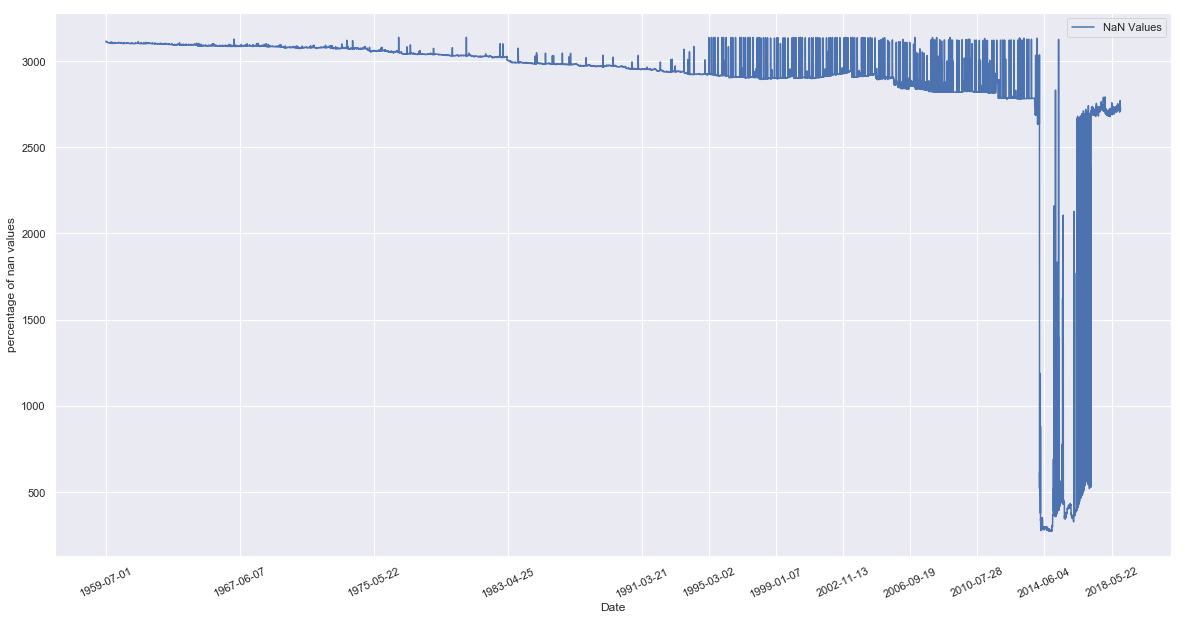

NaNs in df:  43279337


In [240]:
missingValues(df_commodities, 0, percentage=False)

In [246]:
# choose df wil less nans -> from 12k has lowest nans
df_filtered_cms = df_commodities[13926:]
df_filtered_cms

,CHRIS/CME_0D1 - Last,CHRIS/CME_0D2 - Last,CHRIS/CME_0D3 - Last,CHRIS/CME_0D4 - Last,CHRIS/CME_0D5 - Last,CHRIS/CME_0F1 - Last,CHRIS/CME_0F2 - Last,CHRIS/CME_1N1 - Last,CHRIS/CME_1N2 - Last,CHRIS/CME_1N3 - Last,...,CHRIS/CME_Z931 - Last,CHRIS/CME_Z932 - Last,CHRIS/CME_Z933 - Last,CHRIS/CME_Z934 - Last,CHRIS/CME_Z94 - Last,CHRIS/CME_Z95 - Last,CHRIS/CME_Z96 - Last,CHRIS/CME_Z97 - Last,CHRIS/CME_Z98 - Last,CHRIS/CME_Z99 - Last
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-18,579.167,587.756,586.727,586.007,585.381,618.056,615.927,116.788,118.025,117.413,...,49.86,33.04,30.29,30.59,44.19,47.36,60.39,52.99,39.70,35.74
2014-02-19,579.081,586.592,585.238,584.503,583.782,615.967,613.822,116.730,117.736,117.150,...,49.93,33.08,30.33,30.63,45.24,47.50,61.33,53.82,40.35,36.37
2014-02-20,579.462,587.813,586.268,585.435,584.680,618.021,615.435,117.127,119.123,118.424,...,50.37,33.38,30.60,30.90,45.25,47.70,61.36,53.84,40.48,36.56
2014-02-21,578.974,586.446,584.607,583.548,582.698,615.746,613.107,116.819,118.083,117.418,...,50.13,33.22,30.45,30.75,46.06,47.58,62.03,54.42,40.76,37.00
2014-02-24,579.419,589.394,588.072,587.200,586.367,617.444,615.872,116.786,118.498,117.867,...,49.99,33.13,30.37,30.67,45.21,47.39,61.04,53.56,40.35,36.38
2014-02-25,578.287,582.063,580.974,580.480,579.806,610.188,608.766,116.746,117.619,116.844,...,50.04,33.16,30.39,30.70,45.46,47.58,61.23,53.72,40.55,36.86
2014-02-26,578.170,581.569,581.049,580.694,580.026,608.548,607.799,116.729,117.844,117.033,...,50.80,33.66,30.86,31.16,44.81,47.05,60.70,53.25,40.28,36.66
2014-02-27,577.812,579.580,579.540,578.845,578.220,605.247,605.603,116.679,116.863,115.984,...,50.21,33.27,30.50,30.80,44.71,47.23,60.78,53.32,40.21,36.78
2014-02-28,577.813,581.518,581.079,580.737,580.174,607.918,607.529,116.699,117.736,116.869,...,50.43,33.41,30.63,30.93,45.74,47.98,61.73,54.17,40.50,37.09


In [248]:
# returns df without nan values for a specific asset
def find_biggest_full_frame(asset_, df):
    # filter only rows that are not null
    target_asset_notnull = df[asset_].notnull()
    # apply filter
    df_w_clean_target = df[target_asset_notnull]
    # define maximum allowed nan values per asset
    nan_count_tresh = 0
    # filter only rows that have less than the nan_count_tresh nan's
    mask_mean_nan_cols = df_w_clean_target.isnull().sum(axis=0) <= nan_count_tresh
    # apply filter on dataframe
    df_w_clean_target = df_w_clean_target.loc[:, (df_w_clean_target.isnull().sum(axis=0) <= mask_mean_nan_cols)]
    return df_w_clean_target


# choose a prefered stock in which we measure
asset_="CHRIS/CME_Z97 - Last"
df_new = find_biggest_full_frame(asset_, df_filtered_cms)
print("nans for: ",asset_, " = ", get_Total_NaN_of_df(df_new))

df_new.head()

nans for:  CHRIS/CME_Z97 - Last  =  0


,CHRIS/CME_AD1 - Last,CHRIS/CME_AD2 - Last,CHRIS/CME_B310 - Last,CHRIS/CME_B311 - Last,CHRIS/CME_B312 - Last,CHRIS/CME_B313 - Last,CHRIS/CME_B314 - Last,CHRIS/CME_B315 - Last,CHRIS/CME_B316 - Last,CHRIS/CME_B317 - Last,...,CHRIS/CME_Z931 - Last,CHRIS/CME_Z932 - Last,CHRIS/CME_Z933 - Last,CHRIS/CME_Z934 - Last,CHRIS/CME_Z94 - Last,CHRIS/CME_Z95 - Last,CHRIS/CME_Z96 - Last,CHRIS/CME_Z97 - Last,CHRIS/CME_Z98 - Last,CHRIS/CME_Z99 - Last
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-18,0.9017,0.8962,36.89,39.48,49.73,46.27,37.33,32.17,32.68,36.25,...,49.86,33.04,30.29,30.59,44.19,47.36,60.39,52.99,39.70,35.74
2014-02-19,0.8988,0.8933,37.55,40.19,49.29,45.86,38.21,32.94,32.63,36.50,...,49.93,33.08,30.33,30.63,45.24,47.50,61.33,53.82,40.35,36.37
2014-02-20,0.8984,0.8929,37.76,40.41,49.52,46.08,38.37,33.08,33.18,36.55,...,50.37,33.38,30.60,30.90,45.25,47.70,61.36,53.84,40.48,36.56
2014-02-21,0.8959,0.8905,38.24,40.92,49.99,46.51,38.48,33.17,32.95,36.50,...,50.13,33.22,30.45,30.75,46.06,47.58,62.03,54.42,40.76,37.00
2014-02-24,0.9027,0.8971,37.58,40.21,49.34,45.91,38.00,32.75,32.78,36.15,...,49.99,33.13,30.37,30.67,45.21,47.39,61.04,53.56,40.35,36.38


In [250]:
count_days = []
count_commodities = []

for commodity_ in df_new.columns:
    for_commodity = find_biggest_full_frame(commodity_, df_filtered_cms)
    count_days.append(for_commodity.shape[0])
    count_commodities.append(for_commodity.shape[1])
    print("commodity: ",commodity_, " has data for: " ,for_commodity.shape[0],
          " days and ", for_commodity.shape[1], " commodities")



commodity:  CHRIS/CME_AD1 - Last  has data for:  1207  days and  73  commodities
commodity:  CHRIS/CME_AD2 - Last  has data for:  1207  days and  73  commodities
commodity:  CHRIS/CME_B310 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B311 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B312 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B313 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B314 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B315 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B316 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B317 - Last  has data for:  647  days and  143  commodities
commodity:  CHRIS/CME_B32 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/CME_B320 - Last  has data for:  646  days and  161  commodities
commodity:  CHRIS/C

commodity:  CHRIS/CME_L132 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L133 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L134 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L135 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L136 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L137 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L138 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L139 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L14 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L140 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L15 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_L16 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/C

commodity:  CHRIS/CME_Z910 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z911 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z912 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z913 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z914 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z915 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z916 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z917 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z918 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z919 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z92 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS/CME_Z920 - Last  has data for:  645  days and  238  commodities
commodity:  CHRIS

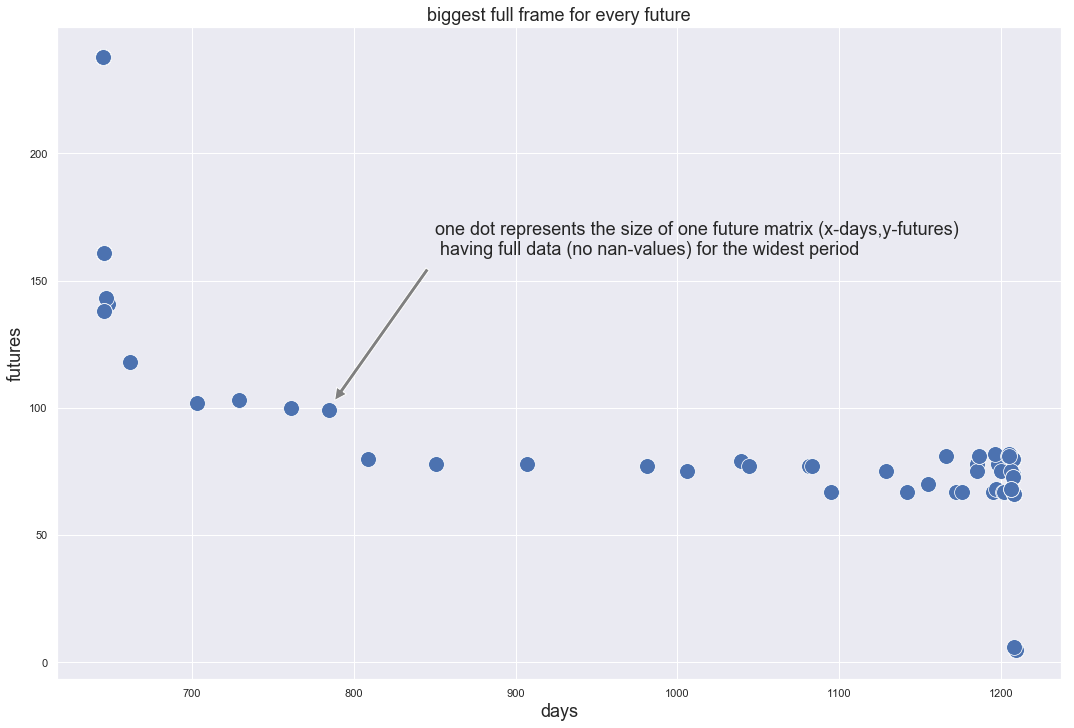

In [266]:
df = pd.DataFrame([count_days, count_commodities])
df = df.transpose()
df.columns = ['days', 'futures']

fontsize=18
fig, ax = plt.subplots(figsize=(18, 12))
ax.set_xlabel('days',size=fontsize)
ax.set_ylabel('futures',size=fontsize)
ax.set_title("biggest full frame for every future", size=fontsize)

ax.annotate('one dot represents the size of one future matrix [x-days,y-futures] \n having full data (no nan-values) for the widest period',
            xy=(785, 100), xytext=(850, 160),
            arrowprops=dict(facecolor='grey', shrink=0.05), size=fontsize,)
ax = sns.scatterplot(x="days", y="futures", s=250, data=df)

## Select one Sample Future & Plot

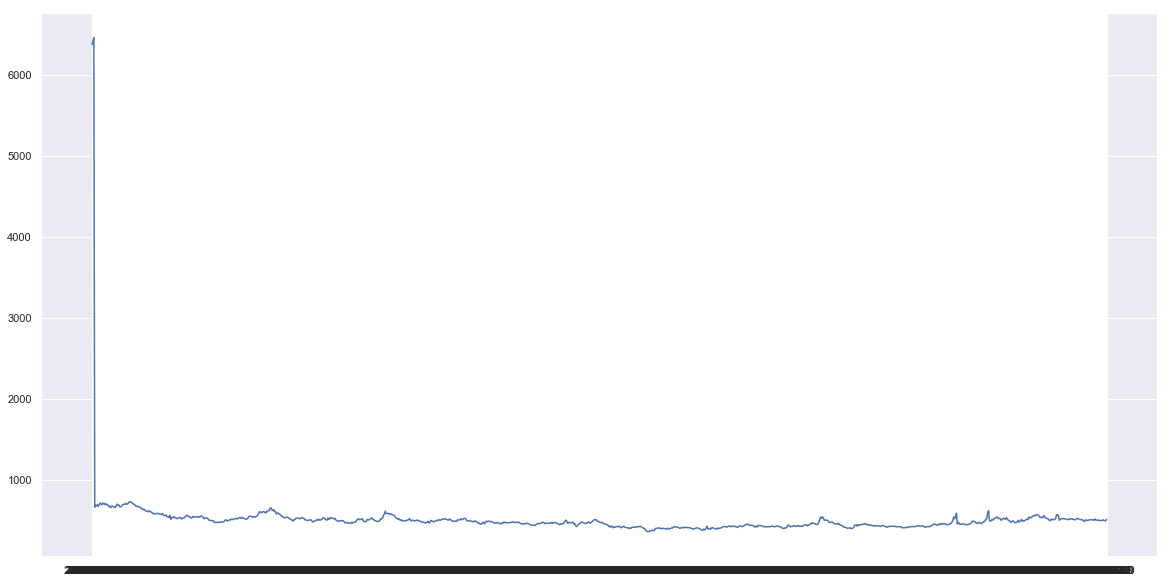

In [268]:
# comma error
future_ = "CHRIS/CME_YW1 - Last"
sel = df_commodities[df_commodities[future_].notnull()]

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(sel[future_])
plt.show()

### TODO

- plot markets and their number c of futures

watch out for 
- one null" values!
- comma error


- calc log returns
- clip eigenvalues to sort if necessary
- rolling


    - dont drop any columns because they are considered to be duplicates 
    - example wheat_A wheat_X -> are still independent and different

### clustering algorithms
- louvre 
- k-means + cross validatiion

